In [1]:
import numpy as np
import scipy as sp
from scipy.special import loggamma
from scipy.optimize import brentq
import matplotlib.pylab as plt

In [2]:
def sum(f,  tol=1e-5, blockSize=10):
    sum=0
    
   
    i=0
    converged=False
    
    while (not converged):
        block=range(i,i+blockSize)
        blockSum=0
        for n in block:
            blockSum+=  f(n)
        i+=blockSize
        sum+=blockSum
        if blockSum < tol:
            converged=True
    
    return sum
def g3D(n) :
        return 0.5 * np.exp(loggamma(n + 3) - loggamma(n + 1) )
def g1D(n):
    return 1.0


def g(d):
    
    if d== 3:
        return g3D
    else:
        if d==1:
            return g1D
        
    
def bose(e ):
    return 1./(np.exp(e) - 1)
def energy(n,d=3):
    return  (n + d/2.)

def averageN(beta,mu,d=3,tol=1e-9):
    deg=g(d)
    return sum(lambda n : bose( beta* (energy(n,d)-mu) )*deg(d),tol=tol )

def averageEnergy(beta,mu,d=3,tol=1e-5):
    deg=g(d)
    return sum(lambda n : energy(n,d)*bose( beta* (energy(n,d)-mu) )*deg(d),tol=tol )

In [3]:
def averageEnergyPerParticle( beta, N ,d=3,minMu=1e-8,maxMu=None):
    if maxMu is None:
        maxMu=0.49999*d
    
    mu=brentq(lambda mu: N - averageN(beta,mu,d=d),minMu,maxMu )
    E=averageEnergy(beta,mu,d=d,tol=1e-9)

    return E/N

<IPython.core.display.Javascript object>


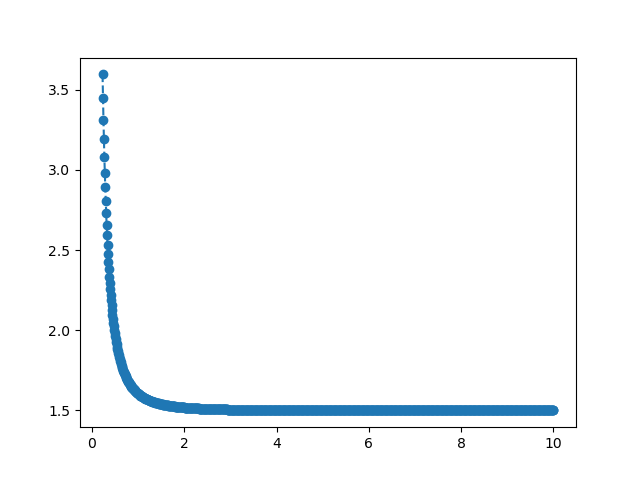

In [73]:
%matplotlib notebook
betas = np.linspace(0.2278,10,num=1000)
N=100
es = np.array([averageEnergyPerParticle(beta,N) for beta in betas ])
plt.plot(betas,es, "o--")

In [ ]:
# 1D bose gas

<IPython.core.display.Javascript object>


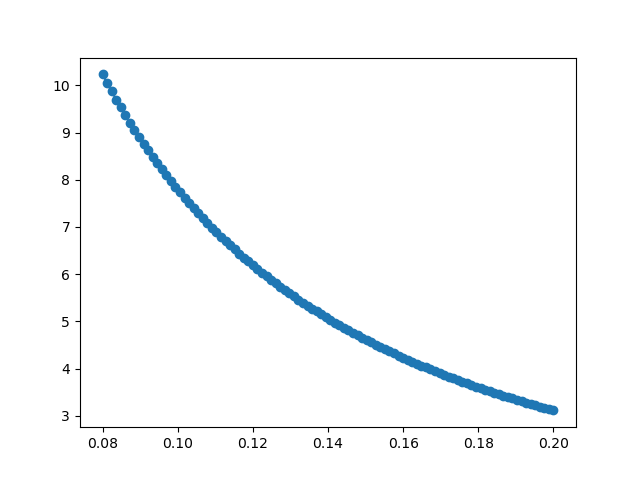

In [4]:
%matplotlib notebook
betas = np.linspace(0.08,0.2,num=100)
N=10
es = np.array([averageEnergyPerParticle(beta,N,d=1,minMu=-8) for beta in betas ])
plt.plot(betas,es, "o--")

In [5]:
beta=1
mu=-4.575
N=averageN(beta,mu,d=1)
print(N)
averageEnergy(beta,mu,d=1)/N

0.009934523949638854


1.0800274568759578

In [70]:
averageEnergyPerParticle( 0.1, 10. ,d=1,minMu=-10,maxMu=0.499)

7.793435699844136

In [77]:
# Canonical ensamble 1D

In [15]:
def n(i,N,x):
    ni=0
    for q in range(1,N+1):
        c=1
        for j in range(q,N+1):
            c*=(1-x**j)
        ni+=c*x**((N-q+1)*i)
    return ni

<IPython.core.display.Javascript object>


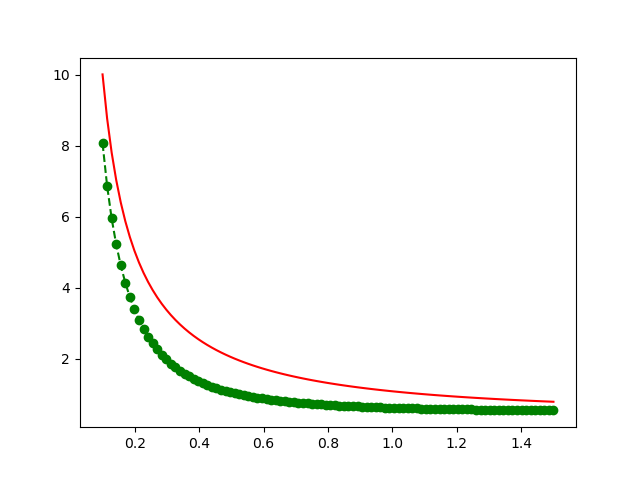

In [16]:
%matplotlib notebook
N=10
betas = np.linspace(0.1,1.5,num=100)
esQ = np.array([sum(lambda i : n(i,N,np.exp(-beta))*i )/N + 0.5  for beta in betas ])
#esC = np.array([sum(lambda i : np.exp(-beta*i)*i )/N*2 + 0.5  for beta in betas ])

plt.plot(betas,esQ, "og--")
plt.plot(betas,0.5 * 1./np.tanh(betas*0.5), "r-")

#plt.plot(betas,esC, "or--")

In [18]:
N=10
sum(lambda i : n(i,N,np.exp(-1))*i )/N + 0.5

0.6186294714378477